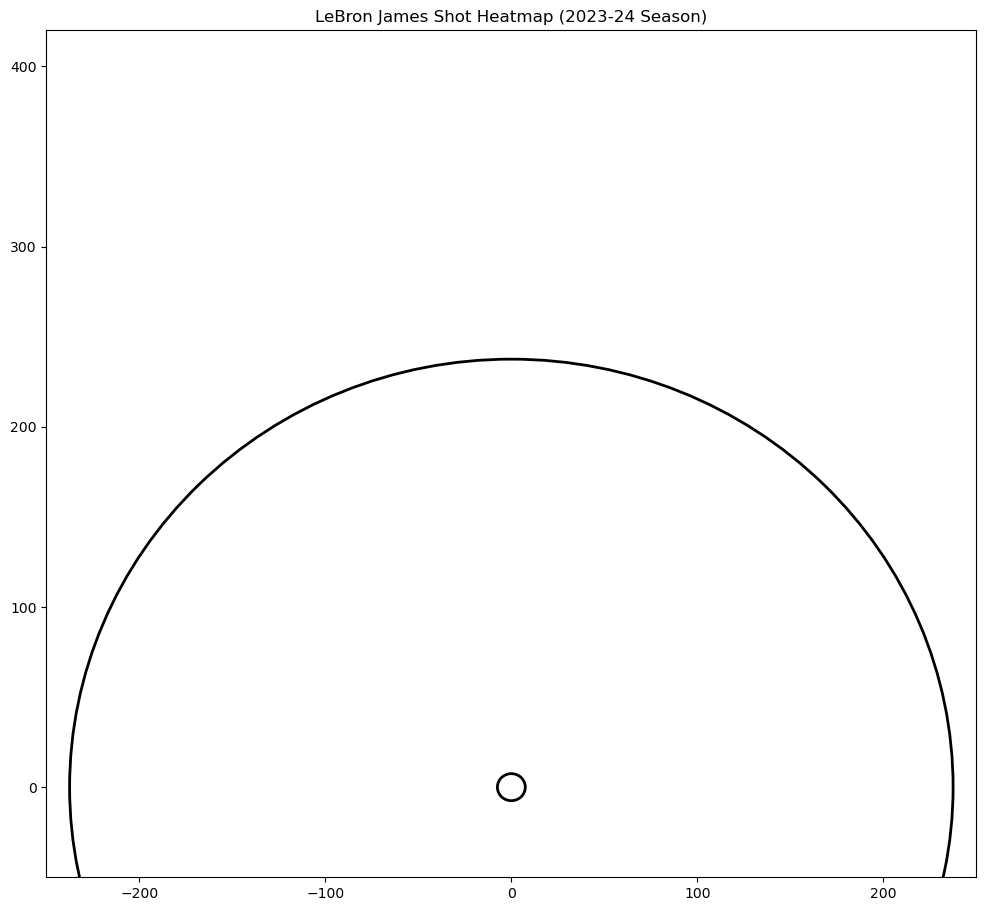

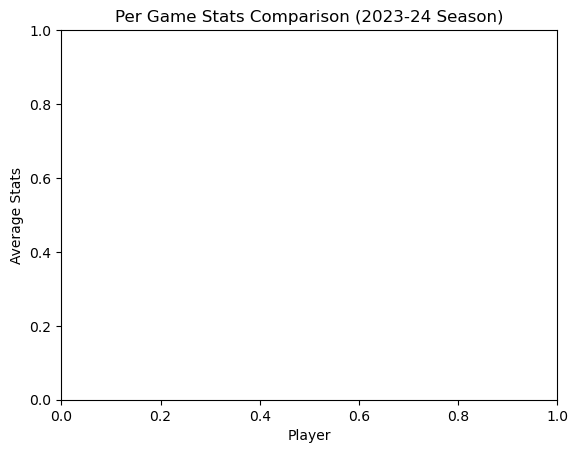

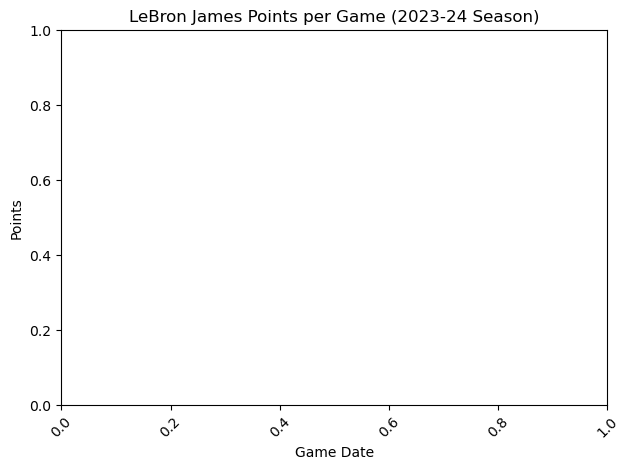

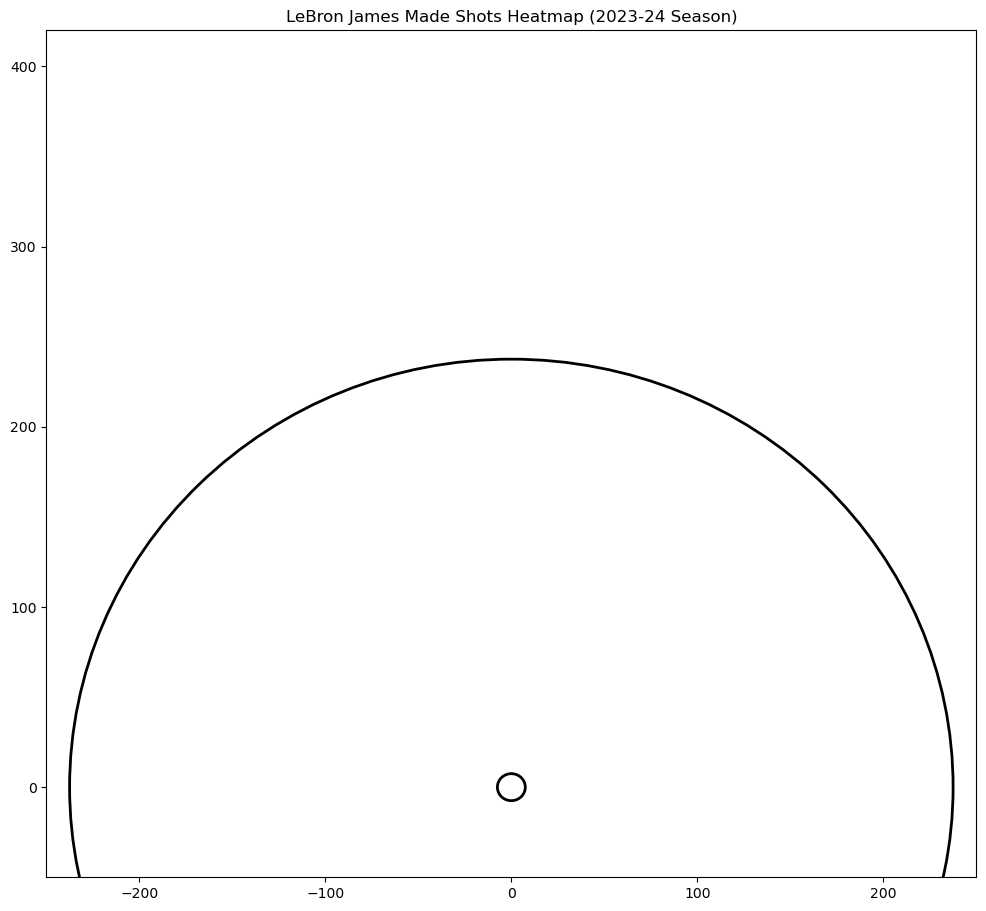

In [33]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

# 連接到資料庫
conn = sqlite3.connect('nba_data.db')
query = """
SELECT loc_x, loc_y, shot_made
FROM shots
WHERE player_id = 2544
"""
conn.close()

# 繪製籃球場
fig, ax = plt.subplots(figsize=(12, 11))
ax.set_xlim(-250, 250)  # 球場寬度（以英寸為單位）
ax.set_ylim(-50, 420)   # 球場長度
# 繪製籃框
hoop = Circle((0, 0), radius=7.5, linewidth=2, color='black', fill=False)
ax.add_patch(hoop)
# 繪製三分線（簡化版）
three_arc = Circle((0, 0), radius=237.5, linewidth=2, color='black', fill=False)
ax.add_patch(three_arc)

# 繪製熱圖
plt.title("LeBron James Shot Heatmap (2023-24 Season)")
plt.show()
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('nba_data.db')
query = """
SELECT p.name, 
       AVG(g.points) AS avg_points, 
       AVG(g.rebounds) AS avg_rebounds, 
       AVG(g.assists) AS avg_assists
FROM players p
JOIN games g ON p.player_id = g.player_id
WHERE p.name IN ('LeBron James', 'Kevin Durant')
GROUP BY p.name
"""
conn.close()

# 繪製柱狀圖
plt.title('Per Game Stats Comparison (2023-24 Season)')
plt.ylabel('Average Stats')
plt.xlabel('Player')
plt.xticks(rotation=0)
plt.show()
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('nba_data.db')
query = """
SELECT game_date, points
FROM games
WHERE player_id = 2544
ORDER BY game_date
"""
conn.close()

plt.title('LeBron James Points per Game (2023-24 Season)')
plt.xlabel('Game Date')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
import sqlite3
import pandas as pd
import plotly.express as px

conn = sqlite3.connect('nba_data.db')
query = """
SELECT p.name, 
       AVG(g.points + g.rebounds + g.assists + g.steals + g.blocks - 
           (g.field_goal_attempts - g.field_goal_made) - 
           (g.free_throw_attempts - g.free_throw_made) - g.turnovers) AS EFF
FROM players p
JOIN games g ON p.player_id = g.player_id
GROUP BY p.name
"""
conn.close()

fig.show()
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

# 從 nba_api 抓取投籃數據並儲存到資料庫
player_id = '2544'  # LeBron James
season = '2023-24'

conn = sqlite3.connect('nba_data.db')
conn.commit()

# 從資料庫提取數據
query = "SELECT loc_x, loc_y, shot_made FROM shots WHERE shot_made = 1"
conn.close()

# 繪製熱圖
fig, ax = plt.subplots(figsize=(12, 11))
ax.set_xlim(-250, 250)
ax.set_ylim(-50, 420)
hoop = Circle((0, 0), radius=7.5, linewidth=2, color='black', fill=False)
ax.add_patch(hoop)
three_arc = Circle((0, 0), radius=237.5, linewidth=2, color='black', fill=False)
ax.add_patch(three_arc)

plt.title("LeBron James Made Shots Heatmap (2023-24 Season)")
plt.show()